# Lecture 4: 시계열 데이터의 탐색 - Timestamp

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 4.1 Pandas의 Timestamp
- Pandas는 날짜와 시간을 캡슐화한 단일 객체인 Timestamp를 지원함


In [75]:
pd.Timestamp(year=2021, month=1, day=1, hour=5,
   minute=10, second=8, microsecond=99)

Timestamp('2021-01-01 05:10:08.000099')

In [76]:
pd.Timestamp('2021/1/10')

Timestamp('2021-01-10 00:00:00')

In [77]:
pd.Timestamp('2021-1/10')

Timestamp('2021-01-10 00:00:00')

In [78]:
pd.Timestamp('Jan 10, 2021 20:45.56')

Timestamp('2021-01-10 20:45:33')

- `pd.to_datetime`을 통해 dataframe의 column을 timestamp로 변환할 수 있음

In [79]:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [80]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [81]:
crime = pd.read_csv("./data/crime.csv")

In [82]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [83]:
crime.dtypes

OFFENSE_TYPE_ID         object
OFFENSE_CATEGORY_ID     object
REPORTED_DATE           object
GEO_LON                float64
GEO_LAT                float64
NEIGHBORHOOD_ID         object
IS_CRIME                 int64
IS_TRAFFIC               int64
dtype: object

In [84]:
crime.REPORTED_DATE[0]

'2014-06-29 02:01:00'

In [85]:
crime['REPORTED_DATE'] = pd.to_datetime(crime.REPORTED_DATE)

In [86]:
crime.dtypes

OFFENSE_TYPE_ID                object
OFFENSE_CATEGORY_ID            object
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID                object
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [87]:
crime.REPORTED_DATE[0]

Timestamp('2014-06-29 02:01:00')

### 시계열을 이용한 슬라이스
- Timestamp를 인덱스로 지정하여 효율적으로 데이터 슬라이싱 

In [88]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [89]:
crime2 = crime.set_index('REPORTED_DATE')

In [90]:
crime2.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [91]:
crime2.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-accident,traffic-accident,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-accident,traffic-accident,-105.049180,39.769296,west-highland,0,1
2016-05-12 16:45:00,fraud-identity-theft,white-collar-crime,-104.931971,39.717359,hilltop,1,0


In [92]:
crime2.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal-mischief-other,public-disorder,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-possession,drug-alcohol,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-accident,traffic-accident,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bicycle,larceny,-104.929350,39.763797,northeast-park-hill,1,0
2016-05-12 09:39:00,theft-of-motor-vehicle,auto-theft,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-peace-other,public-disorder,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-to-injure,public-disorder,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt-rape,sexual-assault,NaN,NaN,harvey-park-south,1,0


In [93]:
crime2.loc['2016-05'].shape

(8012, 7)

In [94]:
crime2.loc['2016'].shape

(91076, 7)

In [95]:
crime2.loc['2016-05-12 03']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 03:11:00,theft-shoplift,larceny,-105.020586,39.678224,college-view-south-platte,1,0
2016-05-12 03:43:00,traf-other,all-other-crimes,-104.892862,39.740153,east-colfax,1,0
2016-05-12 03:18:00,criminal-trespassing,all-other-crimes,-104.990480,39.728076,lincoln-park,1,0
2016-05-12 03:13:00,assault-simple,other-crimes-against-persons,-104.977202,39.739745,capitol-hill,1,0


In [96]:
crime2.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [97]:
crime2.loc['2015-3-4':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-crimes-against-persons,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-crimes-against-persons,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of-services,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-accident-hit-and-run,traffic-accident,-104.987454,39.701378,washington-park-west,0,1
2015-03-04 01:07:00,burglary-business-no-force,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-accident-hit-and-run,traffic-accident,-104.996861,39.738612,civic-center,0,1
2016-01-01 23:16:00,traffic-accident,traffic-accident,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-business,robbery,-105.039236,39.726157,villa-park,1,0


In [98]:
crime2.loc['2015-03-04 22':'2015-03-05 22'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-accident-hit-and-run,traffic-accident,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-accident,traffic-accident,-104.906412,39.632816,hampden-south,0,1
2015-03-04 22:32:00,traffic-accident-hit-and-run,traffic-accident,-104.979180,39.706613,washington-park-west,0,1
2015-03-04 22:33:00,traffic-accident-hit-and-run,traffic-accident,-104.991655,39.740067,civic-center,0,1
2015-03-04 22:36:00,criminal-mischief-other,public-disorder,-105.045234,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2015-03-05 22:09:00,traf-other,all-other-crimes,-104.940575,39.740757,south-park-hill,1,0
2015-03-05 22:12:00,traffic-accident,traffic-accident,-105.005318,39.747556,auraria,0,1
2015-03-05 22:47:00,assault-simple,other-crimes-against-persons,-104.987707,39.718785,baker,1,0


### 시간 데이터로 열 필터링 
- datetime 형식의 열을 사용하려 필터링 하는 경우 datetime Index를 사용할 때와 같이 작동하지 않는 경우가 있음

In [99]:
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [100]:
crime[crime.REPORTED_DATE == '2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [101]:
crime[crime.REPORTED_DATE == '2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


- `.between`은 부분 문자열을 지원하므로 슬라이싱 기능의 대부분을 활용할 수 있음

In [102]:
crime[crime.REPORTED_DATE.between('2016-05-12', '2016-05-13')].REPORTED_DATE.sort_values()

310555   2016-05-12 00:05:00
315074   2016-05-12 00:07:00
312836   2016-05-12 00:13:00
310538   2016-05-12 00:33:00
311301   2016-05-12 01:01:00
                 ...        
299407   2016-05-12 23:50:00
304599   2016-05-12 23:51:00
315139   2016-05-12 23:51:00
295715   2016-05-12 23:51:00
302355   2016-05-12 23:55:00
Name: REPORTED_DATE, Length: 243, dtype: datetime64[ns]

In [103]:
crime[crime.REPORTED_DATE.between('2016-05', '2016-06')].REPORTED_DATE.sort_values()

289289   2016-05-01 00:03:00
283336   2016-05-01 00:09:00
283335   2016-05-01 00:09:00
289275   2016-05-01 00:09:00
165247   2016-05-01 00:27:00
                 ...        
316279   2016-05-31 23:31:00
317825   2016-05-31 23:31:00
311934   2016-05-31 23:34:00
314189   2016-05-31 23:34:00
309627   2016-05-31 23:53:00
Name: REPORTED_DATE, Length: 8012, dtype: datetime64[ns]

In [104]:
crime2.loc['2016-05'].shape

(8012, 7)

In [105]:
crime[crime.REPORTED_DATE.between('2016-05', '2016-06')].shape

(8012, 8)

In [106]:
crime[crime.REPORTED_DATE.between('2016', '2017')].shape

(91076, 8)

In [107]:
crime2.loc['2016'].shape

(91076, 7)

### DatetimeIndex에서만 작동하는 메서드 

- 날짜와 상관없이 시간 기준으로 행 선택

In [108]:
crime2.between_time('2:00', '5:00', include_end=False)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [109]:
crime2.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751535,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


- `.first`: 시간에 대해 첫 n 세그먼트를 선택할 수 있는 메서드
- 인덱스에서 정렬해야 사용 가능 
- `pd.offsets` 모듈에 있는 DateOffset 객체로 표시 

In [110]:
crime_sort = crime2.sort_index()

In [111]:
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


- `normalize=True` 옵션을 사용하면 모든 시간의 구성요소가 0으로 설정됨

In [112]:
pd.offsets.MonthBegin(6, normalize=True)

<6 * MonthBegins>

In [113]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))
# 첫 6달의 데이터를 가지고옴!

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-hit-and-run,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1


In [37]:
crime_sort.first(pd.offsets.MonthBegin(6))
# normalize=True가 없다면 7월 1일날짜의 1개도 가져오게 됨!

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [38]:
crime_sort.first('6MS')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [39]:
crime_sort.first('5D') # 5 days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.999752,39.726081,lincoln-park,1,0
2012-01-06 23:23:00,violation-of-restraining-order,all-other-crimes,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-crimes-against-persons,-104.958983,39.674135,university-park,1,0


In [40]:
crime_sort.first('5B') # 5 business days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-01-08 23:46:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.991384,39.753888,five-points,1,0
2012-01-08 23:51:00,burglary-residence-no-force,burglary,-105.031781,39.747420,sloan-lake,1,0
2012-01-08 23:52:00,theft-other,larceny,-104.968227,39.739752,cheesman-park,1,0


In [41]:
crime_sort.first('7W') # 7 weeks, with weeks ending on Sunday

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-accident,traffic-accident,-104.974663,39.744041,north-capitol-hill,0,1
2012-02-18 22:19:00,criminal-mischief-graffiti,public-disorder,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-accident-dui-duid,traffic-accident,-104.919946,39.761917,north-park-hill,0,1


In [42]:
crime_sort.first('3QS') # 3rd quarter start

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hallucinogen-possess,drug-alcohol,-105.022715,39.678579,college-view-south-platte,1,0
2012-09-30 23:29:00,robbery-street,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of-motor-vehicle,auto-theft,-104.988838,39.686925,overland,1,0


In [43]:
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-accident,traffic-accident,-104.973097,39.740032,capitol-hill,0,1
2012-12-30 23:14:00,burglary-residence-no-force,burglary,-104.960899,39.697153,washington-park,1,0
2012-12-30 23:39:00,theft-of-motor-vehicle,auto-theft,-105.002180,39.769714,sunnyside,1,0


## 4.2 주간 범죄수의 계산 
`.resample`: 가능한 시간 범위별로 그룹화 (groupby와 비슷)

In [44]:
weekly_crimes = crime_sort.resample('W').size() # 주별 요약: 일요일-토요일
weekly_crimes

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [45]:
crime_sort.resample('W-THU').size() # 주별 요약: 목요일-수요일

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

#### `.resample`에서 사용할 수 있는 모든 속성과 메서드

In [46]:
r = crime_sort.resample('W')
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groups',
 'indices',
 'interpolate',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'obj',
 'ohlc',
 'pad',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

C:\Users\whgur\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 12615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\whgur\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 12615 missing from current font.
  font.set_text(s, 0, flags=flags)


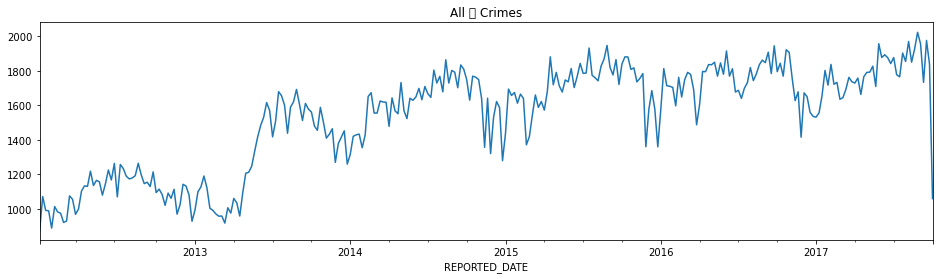

In [47]:
fig, ax = plt.subplots(figsize=(16, 4))
weekly_crimes.plot(title='All ㅇ Crimes', ax=ax)
plt.show()

## 4.3 분기별 범죄와 교통사고를 별도로 집계

- 분기별 범죄와 교통사고 집계

In [48]:
crime2.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [49]:
quarterly_crime = crime2.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()

In [50]:
quarterly_crime.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [51]:
crime2.loc['2012-04-01':'2012-06-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

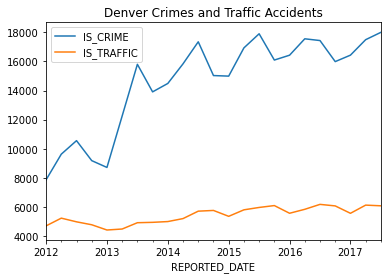

In [52]:
quarterly_crime.plot(title = 'Denver Crimes and Traffic Accidents')
plt.show()

### 백분율 증가 그래프 

In [122]:
crime_begin = quarterly_crime.iloc[0]

In [123]:
quarterly_crime.head()

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [125]:
crime_begin

IS_CRIME      7882
IS_TRAFFIC    4726
Name: 2012-03-31 00:00:00, dtype: int64

In [124]:
quarterly_crime.div(crime_begin).sub(1).round(2).mul(100)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,0.0,0.0
2012-06-30,22.0,11.0
2012-09-30,34.0,6.0
2012-12-31,17.0,2.0
2013-03-31,11.0,-6.0
2013-06-30,56.0,-5.0
2013-09-30,100.0,5.0
2013-12-31,76.0,5.0
2014-03-31,84.0,6.0


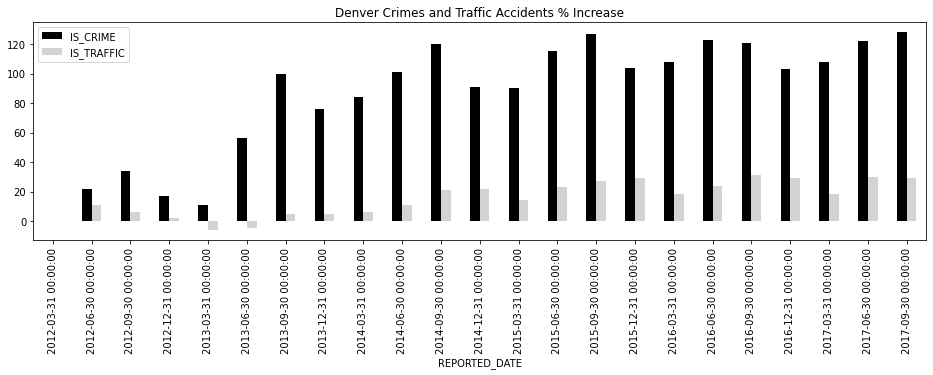

In [57]:
fig, ax = plt.subplots(figsize=(16, 4))
(quarterly_crime.div(crime_begin).sub(1).round(2).mul(100)
    .plot.bar(color=['black', 'lightgrey'], ax=ax,
          title='Denver Crimes and Traffic Accidents % Increase')
)
plt.show()

## 4.4 요일별, 연도별 범죄 측정

`.dt` 속성을 사용해 범죄발생 요일과 연도를 추출할 수 있음

In [58]:
crime.REPORTED_DATE.dt.dayofweek #0:월 ... 6:일

0         6
1         6
2         6
3         6
4         6
         ..
460906    2
460907    1
460908    1
460909    1
460910    1
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [59]:
crime.REPORTED_DATE.dt.day_name()

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
460906    Wednesday
460907      Tuesday
460908      Tuesday
460909      Tuesday
460910      Tuesday
Name: REPORTED_DATE, Length: 460911, dtype: object

In [60]:
crime.REPORTED_DATE.dt.year

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
460906    2017
460907    2017
460908    2017
460909    2017
460910    2017
Name: REPORTED_DATE, Length: 460911, dtype: int64

In [61]:
(crime
   ['REPORTED_DATE']
   .dt.day_name()
   .value_counts(sort=False))
#월화수목금토 순이 아님!

Tuesday      68394
Monday       70024
Thursday     69287
Saturday     58834
Sunday       55213
Wednesday    69538
Friday       69621
Name: REPORTED_DATE, dtype: int64

In [127]:
(crime
   ['REPORTED_DATE']
   .dt.weekday
.value_counts(sort=False))
#월화수목금토 순임!

0    70024
1    68394
2    69538
3    69287
4    69621
5    58834
6    55213
Name: REPORTED_DATE, dtype: int64

In [128]:
crime_week = (crime
   ['REPORTED_DATE']
   .dt.dayofweek
.value_counts(sort=False))

In [129]:
crime_week.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday']

In [130]:
crime_week

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

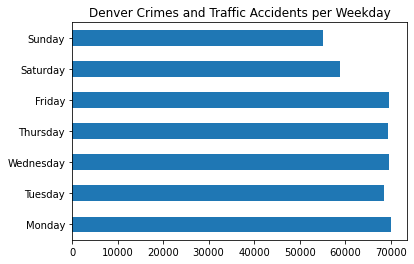

In [131]:
title = 'Denver Crimes and Traffic Accidents per Weekday'
fig, ax = plt.subplots(figsize=(6, 4))
crime_week.plot.barh(title=title, ax=ax)
plt.show()

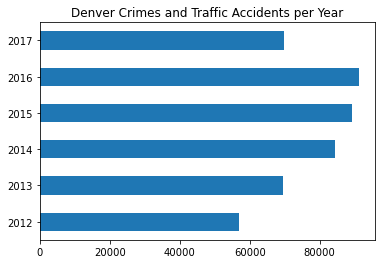

In [67]:
(crime.REPORTED_DATE.dt.year.value_counts(sort=False)
.plot.barh(title = 'Denver Crimes and Traffic Accidents per Year'))
plt.show()

## 이 아래부분 Groupby하는거 신기하네!! 외워두기

In [69]:
crime.groupby([crime.REPORTED_DATE.dt.year.rename('year'),
              crime.REPORTED_DATE.dt.dayofweek.rename('day')]).size()

year  day
2012  0       8786
      1       8191
      2       8440
      3       8440
      4       8549
      5       7442
      6       7189
2013  0      10627
      1      10416
      2      10354
      3      10431
      4      10380
      5       8875
      6       8444
2014  0      12813
      1      12440
      2      12948
      3      12309
      4      12683
      5      10950
      6      10278
2015  0      13452
      1      13381
      2      13320
      3      13512
      4      13273
      5      11586
      6      10624
2016  0      13708
      1      13338
      2      13900
      3      14050
      4      14059
      5      11467
      6      10554
2017  0      10638
      1      10628
      2      10576
      3      10545
      4      10677
      5       8514
      6       8124
dtype: int64

In [70]:
(crime.groupby([crime.REPORTED_DATE.dt.year.rename('year'),
              crime.REPORTED_DATE.dt.dayofweek.rename('day')]).size()
.unstack('day'))

day,0,1,2,3,4,5,6
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,10638,10628,10576,10545,10677,8514,8124
